<a href="https://colab.research.google.com/github/Pedrocoellho/videira-classifier/blob/main/Script_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# --- Carregamento das Bibliotecas ---

In [1]:
import pathlib
import PIL
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
url = '/content/drive/MyDrive/Curso_alura/TensorFlow Keras/Database/uvas'

In [3]:
data_dir = pathlib.Path(url)

In [4]:
len(list(data_dir.glob('*/*.JPG')))

1600

In [5]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['LeafBlight', 'BlackMeasles', 'HealthyGrapes', 'BlackRot']

In [6]:
leafblight = list(data_dir.glob('LeafBlight/*'))

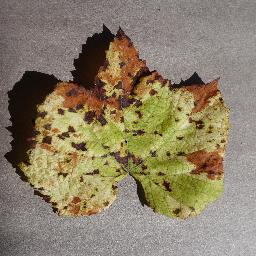

In [7]:
PIL.Image.open(str(leafblight[0]))

# --- Carregando o dataset com imagens redimensionadas ---

In [8]:
for subfolder in subfolders:
  path = data_dir / subfolder
  images = list(path.glob('*.JPG'))
  print(f'Classe {subfolder} tem {len(images)} imagens')

  if images:
    img = PIL.Image.open(str(images[0]))
    img_array = np.array(img)
    print(f'Dimensões da primeira imagem em {subfolder}: {img_array.shape}')

Classe LeafBlight tem 400 imagens
Dimensões da primeira imagem em LeafBlight: (256, 256, 3)
Classe BlackMeasles tem 400 imagens
Dimensões da primeira imagem em BlackMeasles: (256, 256, 3)
Classe HealthyGrapes tem 400 imagens
Dimensões da primeira imagem em HealthyGrapes: (256, 256, 3)
Classe BlackRot tem 400 imagens
Dimensões da primeira imagem em BlackRot: (256, 256, 3)


# --- Separando conjuntos de validação e treino ---

In [9]:
batch_size = 64
altura = 256
largura = 256

In [10]:
train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 1280 files for training.


In [11]:
validation = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size=(altura,largura),
    batch_size=batch_size
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [12]:
train.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

# --- Perceptron de múltiplas camadas ---

In [13]:
tf.random.set_seed(42)

In [14]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)
])

In [15]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# --- Treinando Modelo ---

In [16]:
epocas = 10

history = modelo.fit(
    train,
    validation_data=validation,
    epochs=epocas
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 201s 10s/step - accuracy: 0.2598 - loss: 96.7285 - val_accuracy: 0.4187 - val_loss: 15.6959
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 254ms/step - accuracy: 0.5058 - loss: 17.9131 - val_accuracy: 0.5531 - val_loss: 4.4291
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 222ms/step - accuracy: 0.5415 - loss: 5.6794 - val_accuracy: 0.6469 - val_loss: 2.5615
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.6878 - loss: 1.8363 - val_accuracy: 0.7469 - val_loss: 1.7122
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.7480 - loss: 1.2747 - val_accuracy: 0.7312 - val_loss: 1.2795
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 196ms/step - accuracy: 0.7470 - loss: 1.0882 - val_accuracy: 0.7031 - val_loss: 1.7067
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.6165 - loss: 3.6559 - val_accuracy: 0.6281 - val_loss: 3.3383
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.6612 - loss: 2.6297 - val_accuracy:

In [17]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,499,406 (288.01 MB)

 Trainable params: 25,166,468 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,332,938 (192.00 MB)

In [18]:
def plota_resultados(history,epocas):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  intervalo_epocas = range(epocas)

  plt.figure(figsize=(8,8))
  plt.subplot(1,2,1)
  plt.plot(intervalo_epocas,acc,'r',label='Training accuracy')
  plt.plot(intervalo_epocas,val_acc,'b',label='Validation accuracy')
  plt.legend(loc='lower right')

  plt.subplot(1,2,2)

  plt.plot(intervalo_epocas,loss,'r',label='Training loss')
  plt.plot(intervalo_epocas,val_loss,'b',label='Validation loss')
  plt.legend(loc='upper right')
  plt.show()

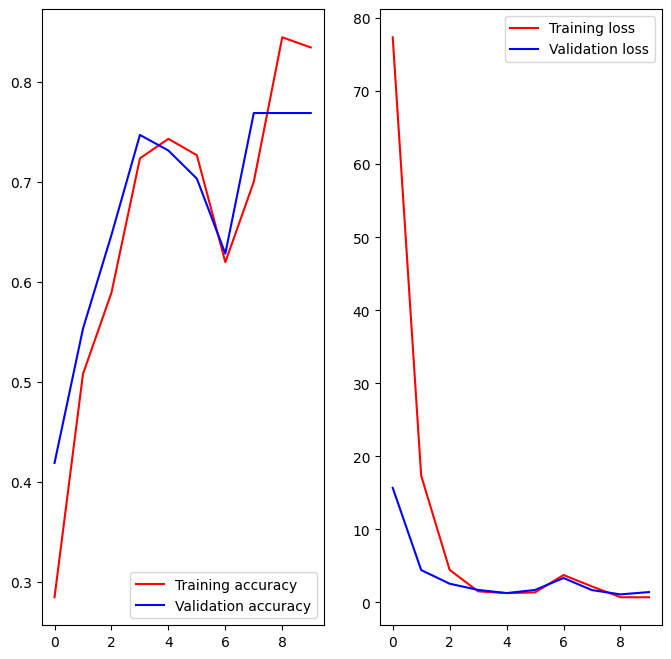

In [19]:
plota_resultados(history,epocas)

# --- Estruturando uma rede Convolucional ---

In [20]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)
])

In [21]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [22]:
epocas = 10

history = modelo.fit(
    train,
    validation_data=validation,
    epochs=epocas
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 347ms/step - accuracy: 0.3019 - loss: 3.2367 - val_accuracy: 0.7781 - val_loss: 0.8079
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 213ms/step - accuracy: 0.7658 - loss: 0.6368 - val_accuracy: 0.8344 - val_loss: 0.4778
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.8930 - loss: 0.3515 - val_accuracy: 0.8000 - val_loss: 0.4993
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - accuracy: 0.9150 - loss: 0.2563 - val_accuracy: 0.9219 - val_loss: 0.2271
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.9710 - loss: 0.0996 - val_accuracy: 0.9469 - val_loss: 0.1823
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 224ms/step - accuracy: 0.9884 - loss: 0.0491 - val_accuracy: 0.9062 - val_loss: 0.2386
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.9906 - loss: 0.0429 - val_accuracy: 0.9438 - val_loss: 0.1556
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 0

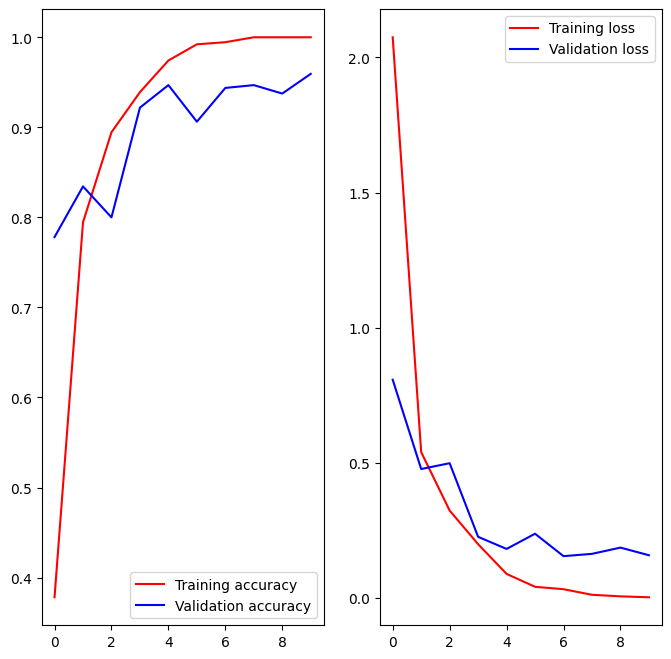

In [23]:
plota_resultados(history,epocas)

In [24]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

# --- Parando o treinamento mais cedo ---

In [25]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.93):
      print('\n Alcançamos 93% de acurácia. Parando o treinamento')
      self.model.stop_training = True

callbacks = myCallback()

In [26]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [27]:
epocas = 10

history = modelo.fit(
    train,
    validation_data=validation,
    epochs=epocas,
    callbacks=[callbacks]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 233ms/step - accuracy: 0.2902 - loss: 4.1928 - val_accuracy: 0.7281 - val_loss: 0.8768
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.6775 - loss: 0.8203 - val_accuracy: 0.8188 - val_loss: 0.4652
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step - accuracy: 0.8733 - loss: 0.3303 - val_accuracy: 0.9000 - val_loss: 0.2486
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.9465 - loss: 0.1747
 Alcançamos 93% de acurácia. Parando o treinamento
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.9470 - loss: 0.1735 - val_accuracy: 0.9312 - val_loss: 0.1916


# --- Aumentando a Diversidade do Dataset ---

In [28]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [29]:
epocas = 50

history = modelo.fit(
    train,
    validation_data=validation,
    epochs=epocas,
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.3053 - loss: 8.1785 - val_accuracy: 0.5312 - val_loss: 1.1003
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.6476 - loss: 0.9155 - val_accuracy: 0.7594 - val_loss: 0.5905
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.8159 - loss: 0.4834 - val_accuracy: 0.8750 - val_loss: 0.3467
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.8760 - loss: 0.3198 - val_accuracy: 0.8719 - val_loss: 0.3623
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - accuracy: 0.9330 - loss: 0.2206 - val_accuracy: 0.9156 - val_loss: 0.2288
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 227ms/step - accuracy: 0.9649 - loss: 0.1145 - val_accuracy: 0.9031 - val_loss: 0.2202
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.9791 - loss: 0.0692 - val_accuracy: 0.9094 - val_loss: 0.2551
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 230ms/step - accuracy: 0.9867 - loss: 0.0576 - val_accuracy: 0.

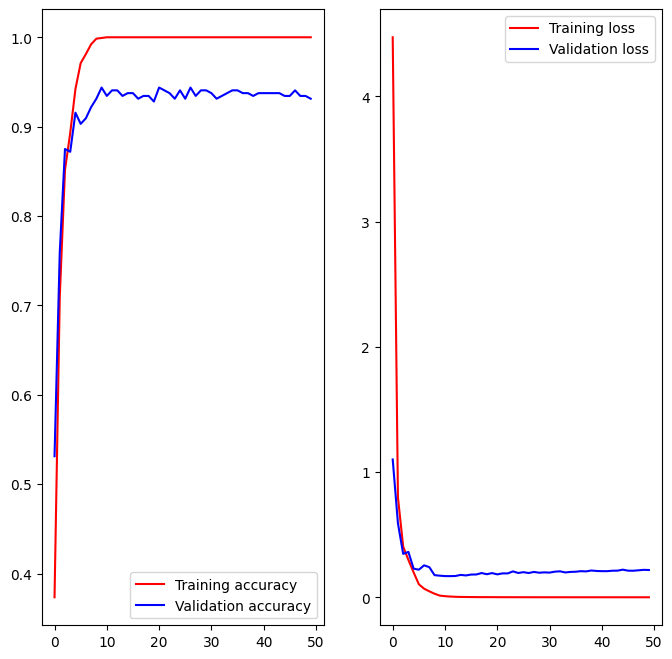

In [30]:
plota_resultados(history,epocas)

In [31]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.5),
    tf.keras.layers.RandomZoom(0.05)
])

In [32]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256,256,3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(4,activation=tf.nn.softmax)
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [33]:
epocas = 50

history = modelo.fit(
    train,
    validation_data=validation,
    epochs=epocas,
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.2757 - loss: 4.7511 - val_accuracy: 0.3688 - val_loss: 1.2903
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.3989 - loss: 1.2082 - val_accuracy: 0.6125 - val_loss: 0.9323
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - accuracy: 0.6496 - loss: 0.7998 - val_accuracy: 0.4750 - val_loss: 1.8510
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.7555 - loss: 0.5494 - val_accuracy: 0.5531 - val_loss: 1.6622
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.8099 - loss: 0.4541 - val_accuracy: 0.5063 - val_loss: 1.9761
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.8283 - loss: 0.4147 - val_accuracy: 0.5938 - val_loss: 1.8798
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step - accuracy: 0.8310 - loss: 0.3904 - val_accuracy: 0.7125 - val_loss: 1.2374
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 274ms/step - accuracy: 0.8308 - loss: 0.4205 - val_accuracy: 0

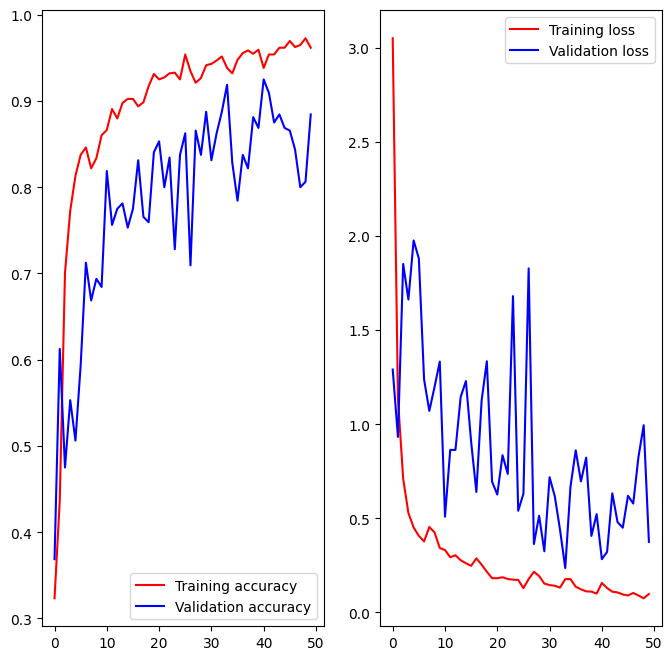

In [34]:
plota_resultados(history,epocas)

In [35]:
modelo.save('modelo_apos_aumento.h5')

# --- Usando modelos pré-treinados ---

In [36]:
input_shape = (256,256,3)

In [37]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape, include_top = False, weights = 'imagenet')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [38]:
modelo_base.trainable = False

In [39]:
modelo_base.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 62, 62,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

# --- Transferindo o aprendizado ---

In [40]:
rescale = tf.keras.layers.Rescaling((1./255))
treino = train.map(lambda x,y: (rescale(x),y))
validacao = validation.map(lambda x,y: (rescale(x),y))

In [41]:
ultima_camada = modelo_base.get_layer('mixed7')
ultima_saida = ultima_camada.output

In [42]:
x = tf.keras.layers.Flatten()(ultima_saida)

x = tf.keras.layers.Dense(1024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(4, activation=tf.nn.softmax)(x)

modelo = tf.keras.Model(inputs=modelo_base.input,outputs=x)

In [43]:
modelo.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 127, 127,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 127, 127,  │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 127, 127,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 125, 125,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 125, 125,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 125, 125,  │        192 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 125, 125,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 62, 62,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 62, 62,    │      5,120 │ max_pooling2d_8[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 62, 62,    │        240 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 62, 62,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 60, 60,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 60, 60,    │        576 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 60, 60,    │          0 │ batch_normalizat

 Total params: 163,121,060 (622.26 MB)

 Trainable params: 154,145,796 (588.02 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [44]:
modelo.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
epocas =20

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,

)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 29s 560ms/step - accuracy: 0.5315 - loss: 10.9013 - val_accuracy: 0.9656 - val_loss: 0.1617
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.9663 - loss: 0.1694 - val_accuracy: 0.9906 - val_loss: 0.0609
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 295ms/step - accuracy: 0.9952 - loss: 0.0167 - val_accuracy: 0.9812 - val_loss: 0.0488
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 238ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9937 - val_loss: 0.0217
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 273ms/step - accuracy: 0.9991 - loss: 0.0013 - val_accuracy: 0.9906 - val_loss: 0.0187
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9969 - val_loss: 0.0095
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 280ms/step - accuracy: 1.0000 - loss: 3.0621e-04 - val_accuracy: 0.9937 - val_loss: 0.0175
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 236ms/step - accuracy: 1.0000 - loss: 1.6576e-04 - val_ac

# --- Salvando modelo ---

In [46]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)

In [47]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

In [48]:
modelo_tflite_quantizado = converter.convert()

Saved artifact at '/tmp/tmp5zpd_0ze'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor_46')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  134364582687376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134364582687760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134364607530960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134364582677200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134364607530768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134364607534032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134364607544016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134364607529040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134364607530192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134364607360720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13436460736

In [49]:
with open('modelo_quantizado16bits.tflite','wb') as f:
  f.write(modelo_tflite_quantizado)